### DISCOVER AND VISUALIZE THE DATA TO GAIN INSIGHTS

Before Starting, we need to do the Previous Steps and Stratified Sampling Once again.
+ Read the Data
+ Find out the Features, info, Categorical Attributes, describe functions on the Data.
+ Splitting the Data to train and test sets using train_test_split method.
+ Categorze median Income to Income Categories.
+ Do the Stratified Splitting.
+ Check the data index and data.
+ Reomve the income_cat from the Sample.

In [1]:
## import the libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
housing = pd.read_csv("housing.csv")
#housing

In [6]:
#housing.info()

In [8]:
#housing["ocean_proximity"].value_counts()

In [10]:
#housing.describe()

In [13]:
## drawing the histogram
#housing.hist(bins = 50, figsize = (25,25))
#plt.show()

In [3]:
## split the function to train_test_split sets.
## using train_test_split method of scikit learn

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

#print(len(train_set)), print(train_set)
#print(len(test_set)), print(test_set)

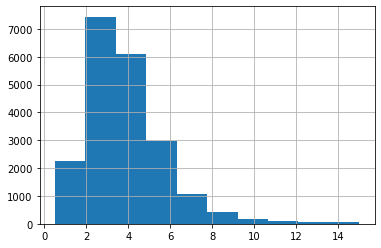

In [4]:
## cateogarize the median_income to income category.
housing["median_income"].hist()

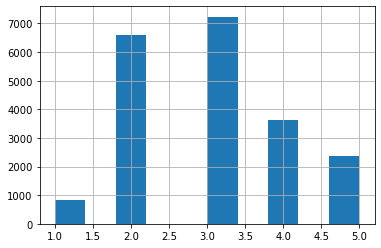

In [5]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                              labels = [1,2,3,4,5])

housing["income_cat"].hist()

In [6]:
## stratified Splitting
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    #print(train_index), print(len(train_index))
    #print(test_index), print(len(test_index))
    
    strat_train_set = housing.loc[train_index]
    #print(strat_train_set)
    strat_test_set = housing.loc[test_index]
    #print(strat_test_set)

In [7]:
## checking the ratio between stratified sample and actual housing data
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [8]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [9]:
#housing

In [10]:
## remove the income cat to make the data as previous.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)
    
    #print(strat_train_set)
    #print(strat_test_set)

**DISCOVER AND VISUALIZE THE DATA TO GAIN INSIGHTS**

+ Put the Test Set Aside.
+ Only Exploring the Training Set.
+ Also, if the training set is very Large, you may want to sample the an Exploration Set.
+ To make the manipulations easy.
+ Make a Copy of Stratified Training Set.

In [19]:
housing = strat_train_set.copy()

In [22]:
housing.shape

(16512, 10)

+ Visualize the Geographical Data.
+ Using teh latitude and longitude, Draw a ScatterPlot
+ To get the High Density Data Points, Set the alpha as 0.1, in the next Figure.

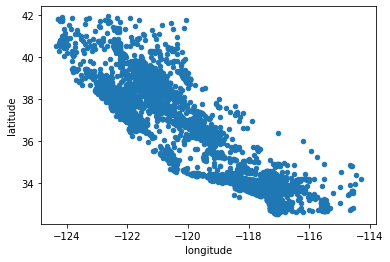

In [24]:
housing.plot(kind = "scatter",
                x = "longitude",
                y = "latitude")

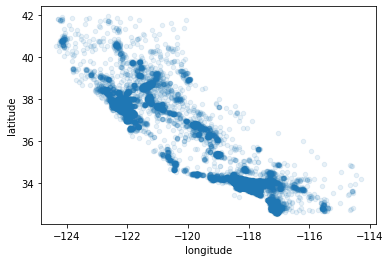

In [26]:
housing.plot(kind = "scatter",
                x = "longitude",
                y = "latitude",
                alpha = 0.1)

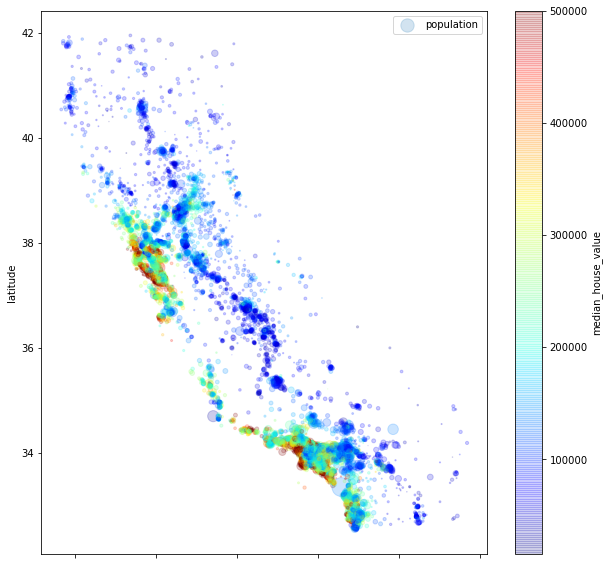

In [30]:
housing.plot(kind = "scatter",
            x="longitude",
            y="latitude",
            alpha=0.2,
            s=housing["population"]/100,
            label="population",
            figsize=(10,10),
            c="median_house_value",
            cmap=plt.get_cmap("jet"),
            colorbar=True)
plt.legend()

+ This Image tells you that the housing price is very much related to the Location (close to the ocean).

+ And to the Population Density.

+ A Clustering Algorithm should be useful for Detecting the Main Clusters.

+ And adding new features that measure the proximity to the Cluster Center.




**LOOKING FOR CORRELATIONS**

+ Compute the Standard Correlation Coefficient (Pearson's r) between every pair of attributes using corr() method.
+ Then Look at how each attribute correlates with the median house Value.

+ The Correlation Coefficient Ranges from 1 to -1.
+ Close to 1 :- Strong Positive Correlation.
+ Close to -1 :- Strong Negative Correlation.
+ Close to 0 :- There is no linear Correlation.

+ Here, median income has a strong +ve Correlation to median house value.
+ Similarly there is lattitude and longitude has slight Negative Correlation to the median house value.


**ANOTHER METHOD**

+ Another Method is to use the pandas scatter_matrix().


+ Which plots every Numerical Attribute against every Other Numerical Attributes.

In [34]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [35]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

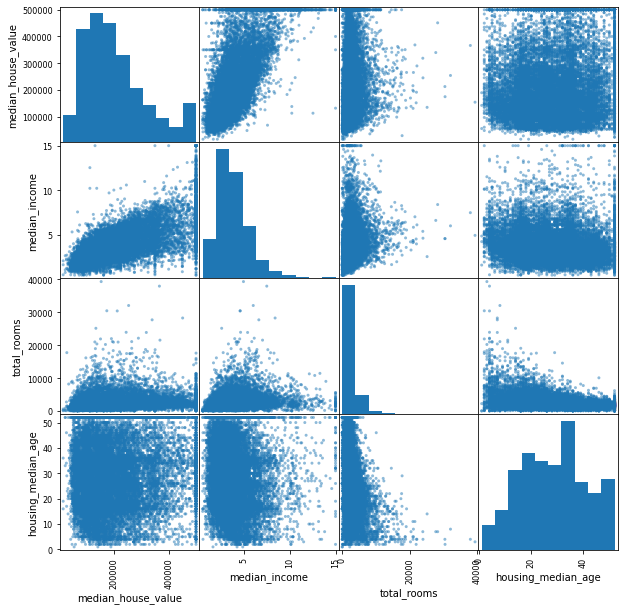

In [37]:
## method 2
from pandas.plotting import scatter_matrix
## select the attribute that we need to know the correlation.
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize = [10,10])
plt.show()

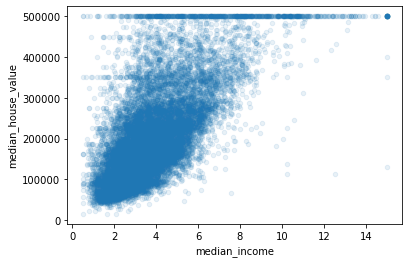

In [38]:
## zoom in the median income plot.
housing.plot(kind = "scatter",
            x = "median_income",
            y = "median_house_value",
            alpha = 0.1)

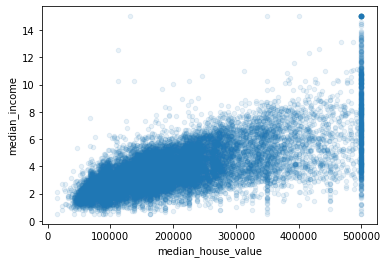

In [39]:
housing.plot(kind = "scatter",
            x = "median_house_value",
            y = "median_income",
            alpha = 0.1)

+ Correlation is very Strong.
+ There is a Clear Uptrend, and Points are not too Dispersed.
+ The Price is Capped.
+ There is a Horizontal line around the `$500000`
+ Also there is Horizontal Lines around `$450000`, `$350000` and `$280000`

+ We will have to Remove the Corresponding Districts to prevent the your Algorithm from learning to Reproduce these data quirks.

In [40]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


EXPERIMENTING WITH ATTRIBUTE COMBINATIONS

+ try out various Attribute Combinations.
+ like rooms per households :- ie number of rooms per house in a district.
+ bedrooms per rooms : - total bedrooms / total rooms
+ population per households :- population / households.

In [41]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [43]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,5.505618,0.193878,3.808989


In [44]:
## checking the correlation.
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

+ Here rooms per household has a positive Correlation.